In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Linear Regression

In [3]:
df = pd.read_csv('Folds5x2_pp.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
x = df.drop(columns=['PE'])
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [6]:
y = df['PE']
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: PE, Length: 9568, dtype: float64

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
# Fit the Linear model

# Instantiate the Linear regression object in
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model using training data sets
lm.fit(x_train,y_train)

# Predict on the test data
y_pred=lm.predict(x_test)
y_pred[:3]


array([435.92761534, 437.49184874, 461.35079992])

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

In [11]:
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:93.1474793667036


# Lasso

In [12]:
df1 = pd.read_csv('Folds5x2_pp.csv')
df1.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [13]:
x = df1.drop(columns=['PE'])
y = df1['PE']

In [14]:
from sklearn.preprocessing  import StandardScaler

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[-1.51786152, -1.065205  , -0.40735691,  1.14394435],
       [ 0.5352555 ,  0.32927685, -0.31305658,  0.06103098],
       [ 1.35381849,  0.20415122, -1.02872873, -2.15068773],
       ...,
       [-0.49130301, -0.86295791,  0.15844507,  0.36652077],
       [-0.26854652,  0.43787645,  0.89600837,  1.46176333],
       [ 0.54062312, -0.23654282, -0.2355956 , -0.14171561]])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import Lasso, LassoCV

In [19]:
lasso = LassoCV()
lasso.fit(x_train,y_train)

LassoCV()

In [20]:
y_pred=lasso.predict(x_test)
y_pred[:3]


array([435.94295705, 437.52563122, 461.33351757])

In [21]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:19.611383974683797
RMSE value:4.428474226489728
MAE value:19.611383974683797


In [22]:
import numpy as np
from sklearn.metrics import r2_score

In [23]:
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:93.1463265738654


In [24]:
lasso_cv = LassoCV(alphas=None,cv=10,max_iter=100000)
lasso_cv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000)

In [25]:
alpha = lasso_cv.alpha_
alpha

0.016254418408356553

In [26]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.016254418408356553)

In [27]:
lasso.score(x_train,y_train)

0.9279913412582322

In [28]:
lasso.score(x_test,y_test)

0.931463265738654

In [29]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1 - r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [30]:
print(adj_r2(x_train,y_train,lasso))

0.9279536847495427


In [31]:
print(adj_r2(x_test,y_test,lasso))

0.9313196581236486


# Ridge

In [32]:
from sklearn.linear_model import Ridge, RidgeCV

In [33]:
ridge = RidgeCV()
ridge.fit(x_train,y_train)

RidgeCV()

In [34]:
y_pred = ridge.predict(x_test)
y_pred

array([435.92816453, 437.49176998, 461.35138696, ..., 467.91108161,
       431.7187943 , 456.64656761])

In [35]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:19.60808852487003
RMSE value:4.428102135776684
MAE value:19.60808852487003


In [36]:
import numpy as np
from sklearn.metrics import r2_score

In [37]:
r2_score = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score*100}")

r2_score:93.14747824867044


In [38]:
alpha = np.random.uniform(0,10,50)
ridge_cv=RidgeCV(alphas=alpha,cv=10)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([1.49303528, 0.23500139, 9.84431467, 1.45391277, 0.07522477,
       1.84952072, 6.39201429, 0.67459088, 7.75926797, 6.21964524,
       5.26929041, 2.13395798, 3.01714836, 1.99444818, 2.8989538 ,
       1.97893227, 1.17742331, 9.70217562, 0.67716216, 5.42188277,
       8.8677538 , 7.70017915, 5.93508176, 5.82838087, 2.78440857,
       2.60002783, 7.27966434, 3.75633692, 4.99512389, 9.59829878,
       2.13209631, 6.40889739, 0.7925908 , 9.88549059, 4.76355386,
       0.35343434, 0.45557042, 8.0920379 , 2.00619394, 7.20539844,
       5.27458705, 8.71773056, 6.62912026, 4.32151421, 1.79042677,
       1.17978969, 2.52627928, 9.29269436, 8.26482332, 7.86386978]),
        cv=10)

In [39]:
alpha = ridge_cv.alpha_
alpha

0.07522476727998217

In [40]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=0.07522476727998217)

In [41]:
ridge.score(x_train,y_train)

0.9279951487312947

In [42]:
ridge.score(x_test,y_test)

0.9314747853755652

In [43]:
print(adj_r2(x_train,y_train,ridge))

0.927957494213701


In [44]:
print(adj_r2(x_test,y_test,ridge))

0.9313312018980913


# Knn

In [45]:
df2 = pd.read_csv('Folds5x2_pp.csv')
df2.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [46]:
x = df2.drop(columns=['PE'])
y = df2['PE']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
df5 = StandardScaler()
data = df5.fit_transform(x_train)
sy = df5.transform(x_test)

In [49]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
y_pred = knn_model.predict(x_test)
y_pred[:5]

array([434.944, 433.07 , 460.57 , 475.926, 443.098])

In [51]:
pc = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
pc

,Actual,Predicted
0,433.27,434.944
1,438.16,433.070
2,458.42,460.570
3,480.82,475.926
4,441.41,443.098
...,...,...
1909,456.70,449.348
1910,438.04,432.534
1911,467.80,465.288
1912,437.14,434.898


In [62]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:15.114903141065826
RMSE value:3.887788978463958
MAE value:15.114903141065826


In [66]:
from sklearn.metrics import r2_score

In [69]:
r2_score1 = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score1*100}")

r2_score:94.71773077666276


# SVM

In [71]:
df3 = pd.read_csv('Folds5x2_pp.csv')
df3.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [72]:
x = df3.drop(columns=['PE'])
y = df3['PE']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
df6 = StandardScaler()
data1 = df6.fit_transform(x_train)
sy = df6.transform(x_test)


In [80]:
Scaler_ss = pd.DataFrame(data1,columns=x.columns)
Scaler_ss.head()

,AT,V,AP,RH
0,0.748053,0.720069,-0.326600,-0.497117
1,0.861819,1.265157,-0.985211,0.818150
2,0.934095,1.523150,0.325238,0.801675
3,1.660862,1.379209,-0.902250,-1.167794
4,1.211150,1.362691,-1.036004,-0.247244


In [3]:
from sklearn.svm import SVR

In [4]:
SVM_model1 = SVR(kernel='linear',C=1)

In [107]:
SVM_model1.fit(x_train,y_train)

SVR(C=1, kernel='linear')

In [1]:
y_pred = SVM_model1.predict(x_test)
y_pred[:5]

NameError: name 'SVM_model1' is not defined

In [115]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:19.60079189931212
RMSE value:4.4272781592432295
MAE value:19.60079189931212


In [121]:
r2_score2 = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score2*100}")

r2_score:93.1500282313107


# Decision tree

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

In [92]:
df9  = pd.read_csv('Folds5x2_pp.csv')
df9.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [93]:
x = df9.drop(columns=['PE'])
y = df9['PE']

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
df9['PE'].unique()

array([480.48, 445.75, 438.76, ..., 470.69, 427.66, 432.9 ])

In [97]:
df9['PE'].value_counts(normalize=True)*100

468.80    0.094064
434.01    0.083612
447.06    0.083612
442.78    0.083612
440.26    0.073161
            ...   
476.09    0.010452
431.25    0.010452
486.36    0.010452
439.44    0.010452
432.90    0.010452
Name: PE, Length: 4836, dtype: float64

In [99]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
clf

DecisionTreeRegressor()

In [101]:
predication = clf.predict(x_test)

In [111]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE value:{mse}")
rmse = np.sqrt(mse)
print(f"RMSE value:{rmse}")
mae = mean_squared_error(y_test,y_pred)
print(f"MAE value:{mae}")

MSE value:19.60079189931212
RMSE value:4.4272781592432295
MAE value:19.60079189931212


In [122]:
r2_score5 = r2_score(y_test,y_pred)
print(f"r2_score:{r2_score5*100}")

r2_score:93.1500282313107


In [137]:
data={'LR':94.7,'Lasso':93,'Ridge':93,'Knn':94.7,'SVM':93.15,'DT':93.15}

In [138]:
keys=list(data.keys())
values=list(data.values())

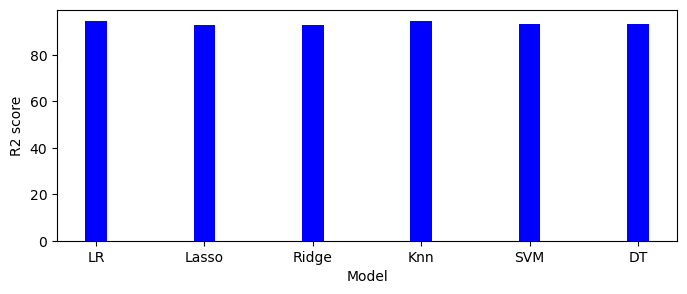

In [143]:
plt.figure(figsize=(8,3))
plt.bar(keys,values,color='BLUE',width=0.2)
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()